<a href="https://colab.research.google.com/github/OG-Data-Ops/MLOps/blob/main/module2_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Download the data

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
!wget $data

--2024-10-05 12:28:39--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.008s  

2024-10-05 12:28:39 (35.3 MB/s) - ‘laptops.csv’ saved [298573/298573]



## Preparing the dataset
First, we'll normalize the names of the columns:

In [3]:
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Exploratory Data Analysis

In [6]:
df = df[['ram', 'storage', 'screen', 'final_price']]

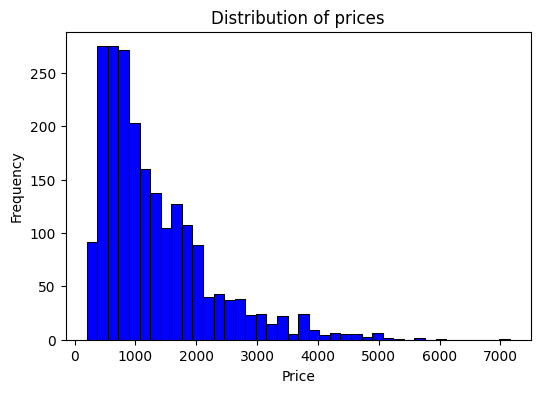

In [7]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price, bins=40, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

Look at the final_price variable. Does it have a long tail?

The final_price has positive skew (that is skewed right). It is normal distribution with long tail

### Question 1: There's one column with missing values. What is it?

In [8]:
df.isnull().sum()

,0
ram,0
storage,0
screen,4
final_price,0


### Question 2 What's the median (50% percentile) for variable 'ram'?

In [9]:
ram_median = df.ram.median()
ram_median

16.0

## Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [10]:
def shuffle_and_split(df, seed):
    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()

    return df_train, df_val, df_test

In [11]:
# Use the shuffle_and_split function with seed 42
df_train, df_val, df_test = shuffle_and_split(df, seed=42)

len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [14]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [15]:
df_train

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0
...,...,...,...
1291,8,256,14.0
1292,32,1000,16.0
1293,16,512,15.6
1294,16,512,14.0


### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

## Train Linear Regression

In [16]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [17]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [18]:
# RMSE function
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [19]:
# Split the data using seed 42 for reproducibility
df_train, df_val, df_test = shuffle_and_split(df, seed=42)

# Prepare target variables
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)

# Drop 'final_price' from the train and validation datasets
df_train = df_train.drop(columns=['final_price']).reset_index(drop=True)
df_val = df_val.drop(columns=['final_price']).reset_index(drop=True)

# Option 1: Fill missing values with 0
df_train_zero = df_train.copy().fillna(0)
df_val_zero = df_val.copy().fillna(0)

# Define the columns to be used for training
base = ['ram', 'storage', 'screen']

# Prepare data for training and validation
X_train_zero = prepare_X(df_train_zero)
X_val_zero = prepare_X(df_val_zero)

# Train linear regression model without regularization
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

# Predict and calculate RMSE for validation dataset (fill missing with 0)
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)
rmse_zero = rmse(y_val, y_pred_zero)
rounded_rmse_zero = round(rmse_zero, 2)

# Option 2: Fill missing values with the mean of training data
mean_values = df_train.mean()
df_train_mean = df_train.copy().fillna(mean_values)
df_val_mean = df_val.copy().fillna(mean_values)

# Prepare data for training and validation
X_train_mean = prepare_X(df_train_mean)
X_val_mean = prepare_X(df_val_mean)

# Train linear regression model without regularization
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

# Predict and calculate RMSE for validation dataset (fill missing with mean)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)
rmse_mean = rmse(y_val, y_pred_mean)
rounded_rmse_mean = round(rmse_mean, 2)

# Compare RMSE scores
rounded_rmse_zero, rounded_rmse_mean


(0.43, 0.43)

<Axes: ylabel='Count'>

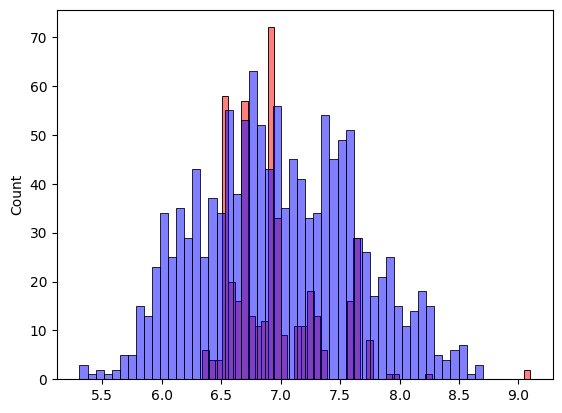

In [20]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

<Axes: ylabel='Count'>

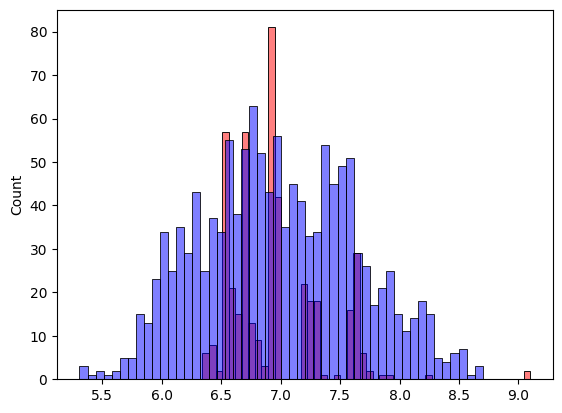

In [21]:
sns.histplot(y_pred_zero, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [22]:
# Regularization
df_train_zero = df_train.copy().fillna(0)

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [23]:
# Tuning the model

for r in [0.0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train_zero)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, score, score.round(2))

0.0 0.4288635315474416 0.43
0.01 0.4288516360534088 0.43
0.1 0.42877560097076456 0.43
1 0.4305932989743414 0.43
5 0.4632095257580652 0.46
10 0.507565776923692 0.51
100 0.673502606172582 0.67


### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [33]:
seeds = list(range(10))
rmse_scores = []

for seed in seeds:
    # Split data using the current seed
    df_train, df_val, df_test = shuffle_and_split(df, seed)

    # Reset index and prepare target variables
    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)

    # Drop 'final_price' from train and validation datasets
    df_train = df_train.drop(columns=['final_price']).reset_index(drop=True)
    df_val = df_val.drop(columns=['final_price']).reset_index(drop=True)

    # Prepare training and validation data
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)

    # Train the model without regularization
    w0, w = train_linear_regression(X_train, y_train)

    # Predict and calculate RMSE
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

# Calculate standard deviation of RMSE scores
std_rmse = np.std(rmse_scores)
rounded_std_rmse = round(std_rmse, 3)
rounded_std_rmse

0.014

In [29]:
np.expm1(0.014)

0.014098458938492346

### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [32]:
# Split the data using seed 9
df_train, df_val, df_test = shuffle_and_split(df, seed=9)

# Combine train and validation datasets
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

# Prepare target variables
y_train = np.log1p(df_full_train.final_price.values)
y_test = np.log1p(df_test.final_price.values)

# Drop 'final_price' from the combined train and test datasets
df_full_train = df_full_train.drop(columns=['final_price']).reset_index(drop=True)
df_test = df_test.drop(columns=['final_price']).reset_index(drop=True)

# Fill missing values with 0
df_full_train_zero = df_full_train.fillna(0)
df_test_zero = df_test.fillna(0)

# Prepare training and test data
X_full_train = prepare_X(df_full_train_zero)
X_test = prepare_X(df_test_zero)

# Train linear regression model with regularization (r=0.001)
w0, w = train_linear_regression_reg(X_full_train, y_train, r=0.001)

# Predict on the test dataset
y_pred = w0 + X_test.dot(w)

# Calculate RMSE for the test dataset
score = rmse(y_test, y_pred)

# Convert the RMSE back from log scale to original scale
rmse_original_scale = np.expm1(score)
rounded_rmse_original_scale = round(rmse_original_scale, 2)

rounded_rmse_original_scale


0.58